In [10]:
import tensorflow as tf
import cv2 
import os
import matplotlib.pyplot as plt 
import numpy as np

In [11]:
img_array=cv2.imread("Train_Dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)


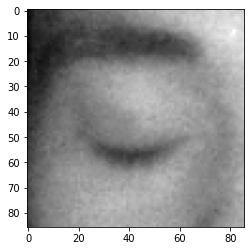

In [12]:
plt.imshow(img_array,cmap="gray")


In [13]:
img_array.shape

(86, 86)

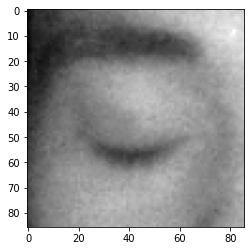

In [14]:
Datadirectory= "Train_Dataset/"
Classes=["Closed_Eyes", "Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


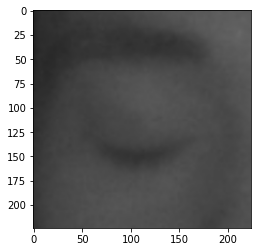

In [15]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [16]:
new_array.shape

(224, 224, 3)

In [17]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [18]:
create_training_Data()

In [19]:
 print(len(training_Data))

2363


In [20]:
import random 
random.shuffle(training_Data)#

In [21]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) 


In [22]:
X.shape

(2363, 224, 224, 3)

In [23]:
X = X/255.0;

In [24]:
Y = np.array(y)

In [25]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model = tf.keras.applications.mobilenet.MobileNet()

In [28]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

#transfer learning

In [29]:
base_input = model.layers[0].input

In [30]:
base_output = model.layers[-4].output

In [31]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [32]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [33]:
for layer in model.layers:
    layers.trainable= False

In [34]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

#binary classification(open/closed)


In [35]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [36]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)


67/67 [==============================] - 133s 2s/step - loss: 0.1638 - accuracy: 0.9520 - val_loss: 0.8029 - val_accuracy: 0.7511


In [31]:
new_model.save("model.h5")

In [32]:
new_model=tf.keras.models.load_model("my_model.h5")

#checking the network for predictions


In [33]:
img_array = cv2.imread("s0001_01881_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [34]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [35]:
X_input.shape

(1, 224, 224, 3)

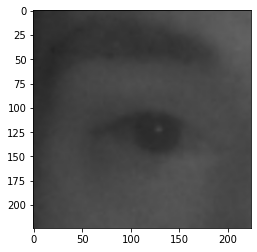

In [36]:
plt.imshow(new_array)

In [37]:
X_input = X_input/255.0

In [38]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 392ms/step


In [39]:
prediction

array([[25.943947]], dtype=float32)

#checking the model

In [40]:
img = cv2.imread("testsample.jpg")

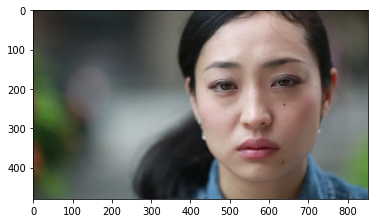

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [42]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

In [43]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [45]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [46]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

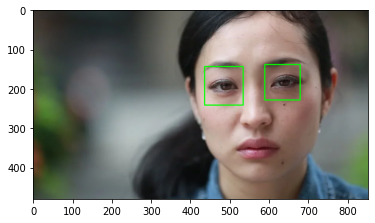

In [47]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [48]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
         print("Eyes not detected")
    else:
        for ex, ey, ew, eh in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

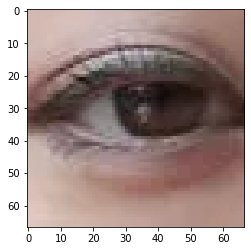

In [49]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [50]:
eyes_roi.shape

(67, 67, 3)

In [51]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
final_image = final_image/255.0

In [52]:
final_image.shape

(1, 224, 224, 3)

In [53]:
new_model.predict(final_image)

1/1 [==============================] - 0s 46ms/step


array([[33.094707]], dtype=float32)

In [55]:
from deepface import DeepFace

In [ ]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)


if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are clossed")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    
    
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw rectangle around faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText() method for
    #Inserting text on video
    
    cv2.putText(frame, 
                status, 
                (50, 50), 
                font, 3, 
                (0, 0, 255), 
                2, 
                cv2.LINE_4)
    cv2.imshow("Drowsiness Detection",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 47ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 42ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 41ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 48ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 59ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 46ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 46ms/step
False
1/1 [==============================] - 0s 49ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
Eyes are clossed
1/

1/1 [==============================] - 0s 40ms/step
False
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 38ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 44ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 43ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 41ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 44ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 49ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 41ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 39ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 47ms/step
Fals

Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 41ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 50ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 46ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 45ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 45ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
1/1 [==============================] - 0s 46ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 38ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 45ms/step
False
Eyes are clossed
1/1 [=================

1/1 [==============================] - 0s 58ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 47ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 43ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 39ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 60ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 42ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 47ms/step
False
Eyes are clossed
Eyes are clo

Eyes are clossed
1/1 [==============================] - 0s 61ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 39ms/step
False
1/1 [==============================] - 0s 43ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 46ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 45ms/step
False
1/1 [==============================] - 0s 40ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 44ms/step
False
1/1 [==============================] - 0s 44ms/step
False
1/1 [==============================] - 0s 44ms/step
False
1/1 [==============================] - 0s 52ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 43ms/step
False
Eyes are clossed
Eyes are clossed
1/1 [==============================] - 0s 41ms/step
False
Eyes are clossed
Eyes are clossed
Eyes are

1/1 [==============================] - 0s 44ms/step
False
1/1 [==============================] - 0s 42ms/step
False
1/1 [==============================] - 0s 53ms/step
False
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 42ms/step
False
1/1 [==============================] - 0s 41ms/step
False
1/1 [==============================] - 0s 40ms/step
False
1/1 [==============================] - 0s 37ms/step
False
1/1 [==============================] - 0s 40ms/step
False
1/1 [==============================] - 0s 41ms/step
False
1/1 [==============================] - 0s 59ms/step
False
1/1 [==============================] - 0s 41ms/step
False
1/1 [==============================] - 0s 40ms/step
False
1/1 [==============================] - 0s 45ms/step
False
1/1 [==============================] - 0s 39ms/step
False
1/1 [==============================] - 0s 41ms/step
False
Eyes are clossed
1/1 [==============================] - 0s 44ms/step
Fal

Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 29ms/step


NameError: name 'font' is not defined